# Implementation of ANN using Keras:

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


# GPU / CPU Check

In [3]:
tf.config.list_physical_devices("GPU")

[]

In [4]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Creating a simple classifier using keras on MNIST data

In [6]:
mnist = tf.keras.datasets.mnist

mnist

In [11]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Users\\VAIBHAV\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [13]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [14]:
X_train_full[0].shape

(28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
len(X_test[1][0])

28

In [10]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [14]:
len(X_train_full[5000:] )

55000

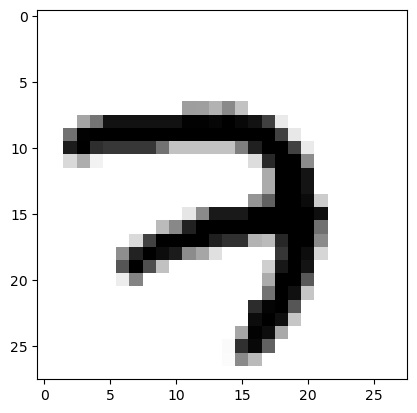

In [17]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

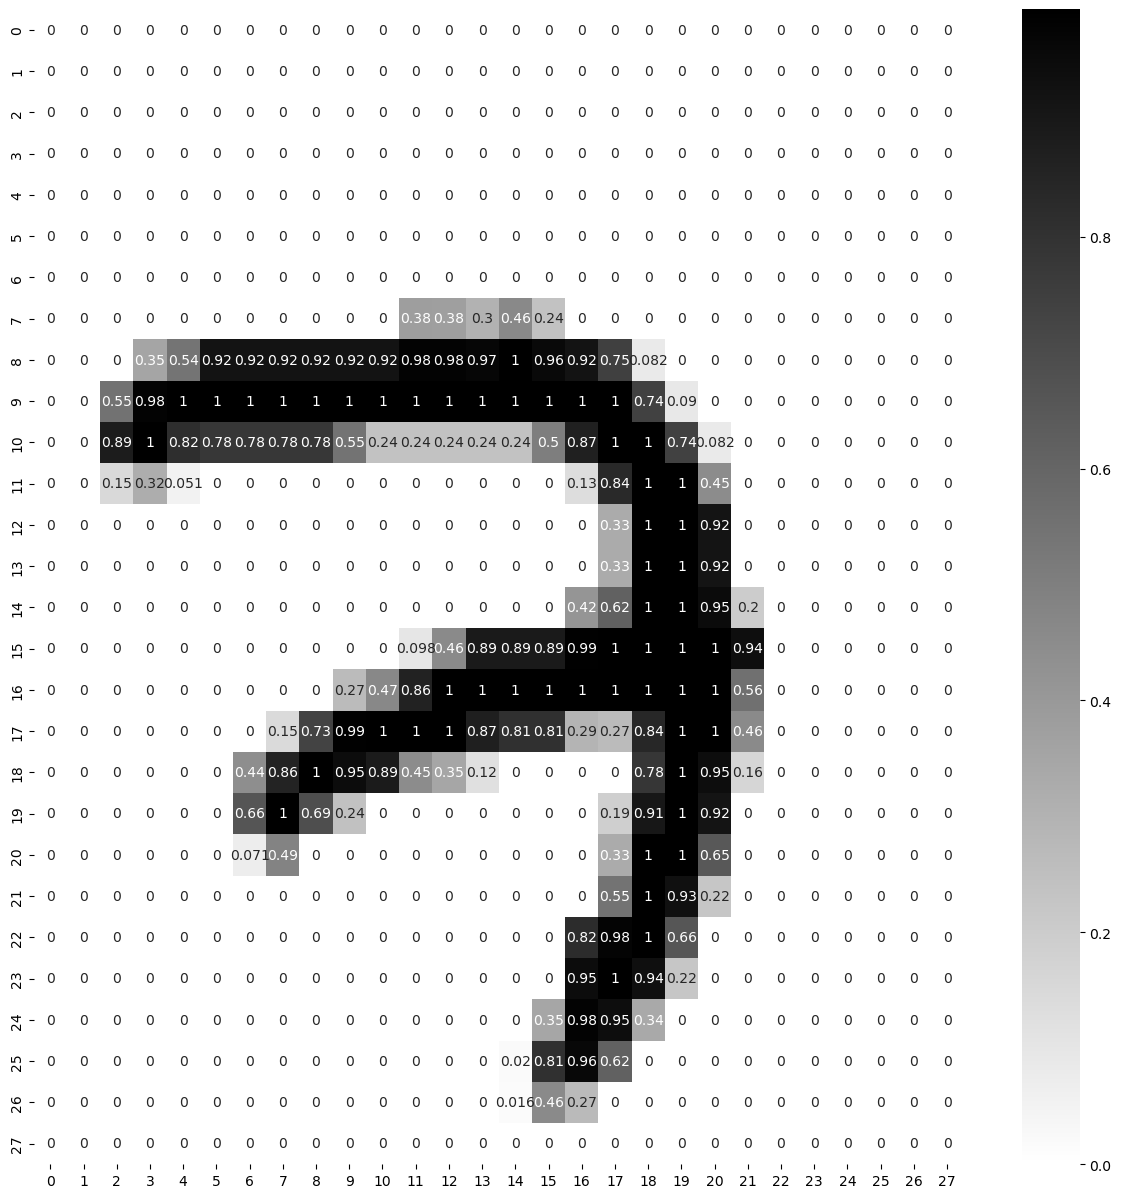

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

# Architecture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500" 
height="300">

In [19]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [20]:
model_clf.layers

In [21]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [23]:
# Total parameters to be trained 
sum((235500, 30100, 1010))

266610

In [24]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [36]:
len(hidden1.get_weights()[0])

784

In [ ]:
hidden1.get_weights()[0].shape

In [37]:
hidden1.get_weights()

[array([[-0.00337525,  0.04680152, -0.0027792 , ..., -0.04331146,
         -0.00848648,  0.02632602],
        [-0.0623063 ,  0.0344222 , -0.02540609, ...,  0.02310441,
         -0.0304629 , -0.01527403],
        [-0.05481648,  0.04066424, -0.06756051, ..., -0.03243021,
         -0.03573782,  0.05663477],
        ...,
        [ 0.04900396, -0.05376239,  0.04527165, ...,  0.02890007,
         -0.03782417,  0.06411266],
        [ 0.0160949 ,  0.02424984,  0.0460298 , ..., -0.0727563 ,
          0.07096827, -0.06588912],
        [-0.01537065,  0.00623975,  0.05802488, ..., -0.06437115,
         -0.02955531,  0.04688423]], dtype=float32),
 array([ 0.00943877,  0.0333755 , -0.00035687,  0.00160663,  0.0075421 ,
        -0.00771492, -0.00865108,  0.00880173,  0.01975842,  0.01847633,
        -0.00395173,  0.00821226,  0.01578517, -0.01039199,  0.01000969,
         0.03534034,  0.0126928 ,  0.03345712, -0.00204022,  0.02353751,
         0.03765342,  0.01074814,  0.00199685, -0.00828412,  0.007

In [38]:
weights, biases = hidden1.get_weights()

In [39]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.00337525,  0.04680152, -0.0027792 , ..., -0.04331146,
        -0.00848648,  0.02632602],
       [-0.0623063 ,  0.0344222 , -0.02540609, ...,  0.02310441,
        -0.0304629 , -0.01527403],
       [-0.05481648,  0.04066424, -0.06756051, ..., -0.03243021,
        -0.03573782,  0.05663477],
       ...,
       [ 0.04900396, -0.05376239,  0.04527165, ...,  0.02890007,
        -0.03782417,  0.06411266],
       [ 0.0160949 ,  0.02424984,  0.0460298 , ..., -0.0727563 ,
         0.07096827, -0.06588912],
       [-0.01537065,  0.00623975,  0.05802488, ..., -0.06437115,
        -0.02955531,  0.04688423]], dtype=float32)

In [40]:
print("shape\n", biases.shape)

shape
 (300,)


In [41]:
biases

array([ 0.00943877,  0.0333755 , -0.00035687,  0.00160663,  0.0075421 ,
       -0.00771492, -0.00865108,  0.00880173,  0.01975842,  0.01847633,
       -0.00395173,  0.00821226,  0.01578517, -0.01039199,  0.01000969,
        0.03534034,  0.0126928 ,  0.03345712, -0.00204022,  0.02353751,
        0.03765342,  0.01074814,  0.00199685, -0.00828412,  0.00770157,
        0.00892328,  0.01952746, -0.00465752,  0.00460187, -0.00859253,
       -0.00380979,  0.00712739,  0.01130609, -0.00276677,  0.00450734,
       -0.00839777,  0.00415098,  0.01245072,  0.009259  ,  0.00974506,
        0.0066542 ,  0.00786686,  0.01834623, -0.01937916, -0.01690545,
       -0.00256163,  0.03901243,  0.01320825,  0.0030586 ,  0.01082504,
        0.01984934,  0.02335319, -0.00525453, -0.00171857,  0.00468802,
        0.00489406,  0.00350754, -0.00871617,  0.03636438,  0.03034455,
        0.01207378, -0.00819029,  0.00458987, -0.00204033,  0.03354812,
       -0.01369209,  0.00960434,  0.01232559, -0.02213036, -0.00

In [42]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [43]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1022 - accuracy: 0.9712 - val_loss: 0.1100 - val_accuracy: 0.9682
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0936 - accuracy: 0.9745 - val_loss: 0.1026 - val_accuracy: 0.9702
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.9759 - val_loss: 0.0968 - val_accuracy: 0.9736
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0800 - accuracy: 0.9781 - val_loss: 0.0922 - val_accuracy: 0.9746
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0739 - accuracy: 0.9801 - val_loss: 0.0898 - val_accuracy: 0.9754
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0690 - accuracy: 0.9807 - val_loss: 0.0879 - val_accuracy: 0.9752
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0643 - accuracy: 0.9824 - val_loss: 0.0842 - val_accuracy:

In [44]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [45]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.102194,0.971236,0.109962,0.9682
1,0.093643,0.974545,0.102611,0.9702
2,0.086773,0.975873,0.096801,0.9736
3,0.079995,0.978055,0.092246,0.9746
4,0.073903,0.980145,0.089836,0.9754
5,0.068986,0.980727,0.087900,0.9752
6,0.064308,0.982400,0.084181,0.9768
7,0.059872,0.984127,0.080511,0.9774
8,0.056031,0.985018,0.081120,0.9772
9,0.052327,0.986509,0.076500,0.9788


<Axes: >

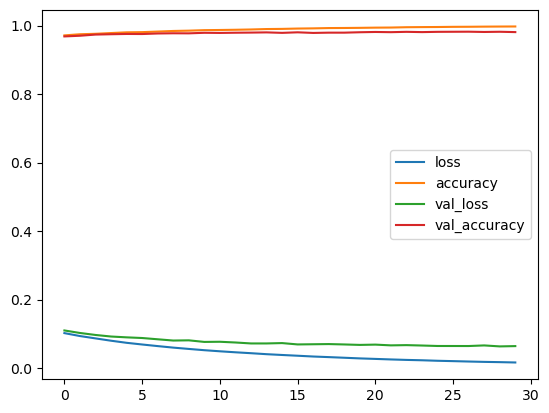

In [46]:
pd.DataFrame(history.history).plot()

In [47]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14.9385 - accuracy: 0.9746


[14.938530921936035, 0.9746000170707703]

In [49]:
x_new = X_test[:3]
x_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [50]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [51]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 158ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [52]:
y_prob

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
y_pred = np.argmax(y_prob, axis = -1)

In [54]:
y_pred

array([7, 2, 1], dtype=int64)

In [55]:
actual

array([7, 2, 1], dtype=uint8)

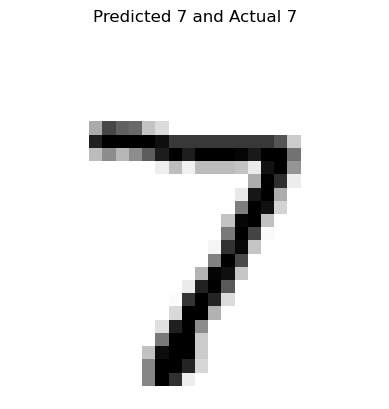

######################


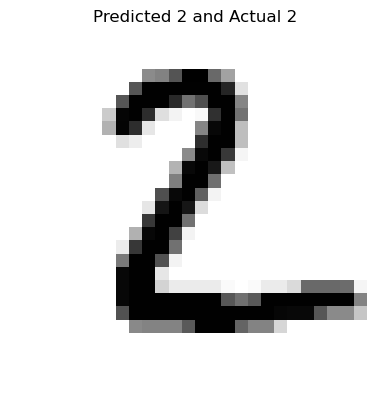

######################


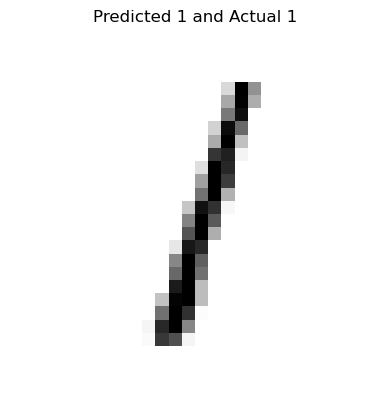

######################


In [56]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")